# Zestimate - EDA
By Lily Elizabeth John

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Load Data Dictionary and Labels Dataset

In [2]:
datadict=pd.read_excel(r"zillow_data_dictionary.xlsx",'Data Dictionary')
heatingorsystemtypeid=pd.read_excel(r"zillow_data_dictionary.xlsx",'HeatingOrSystemTypeID')
heatingorsystemtypeid=heatingorsystemtypeid.to_dict(orient='dict')
propertylandusetypeid=pd.read_excel(r"zillow_data_dictionary.xlsx",'PropertyLandUseTypeID')
propertylandusetypeid=propertylandusetypeid.to_dict(orient='dict')
storytypeid=pd.read_excel(r"zillow_data_dictionary.xlsx",'StoryTypeID')
storytypeid=storytypeid.to_dict(orient='dict')
airconditioningtypeid=pd.read_excel(r"zillow_data_dictionary.xlsx",'AirConditioningTypeID')
airconditioningtypeid=airconditioningtypeid.to_dict(orient='dict')
architecturalstyletypeid=pd.read_excel(r"zillow_data_dictionary.xlsx",'ArchitecturalStyleTypeID')
architecturalstyletypeid=architecturalstyletypeid.to_dict(orient='dict')
typeconstructiontypeid=pd.read_excel(r"zillow_data_dictionary.xlsx",'TypeConstructionTypeID')
typeconstructiontypeid=typeconstructiontypeid.to_dict(orient='dict')
buildingclasstypeid=pd.read_excel(r"zillow_data_dictionary.xlsx",'BuildingClassTypeID')
buildingclasstypeid=buildingclasstypeid.to_dict(orient='dict')

### Explore properties_2016.csv dataset

In [3]:
properties2016=pd.read_csv(r"properties_2016.csv",dtype={'hashottuborspa':'category','propertycountylandusecode':'str',\
                                                        'propertyzoningdesc':'str','fireplaceflag':'category',\
                                                        'taxdelinquencyflag':'category'})

In [4]:
properties2016.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [5]:
properties2016.shape

(2985217, 58)

In [6]:
properties2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 58 columns):
parcelid                        int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottub

In [7]:
properties2016.head(2).T

,0,1
parcelid,10754147,10759547
airconditioningtypeid,NaN,NaN
architecturalstyletypeid,NaN,NaN
basementsqft,NaN,NaN
bathroomcnt,0,0
bedroomcnt,0,0
buildingclasstypeid,NaN,NaN
buildingqualitytypeid,NaN,NaN
calculatedbathnbr,NaN,NaN
decktypeid,NaN,NaN


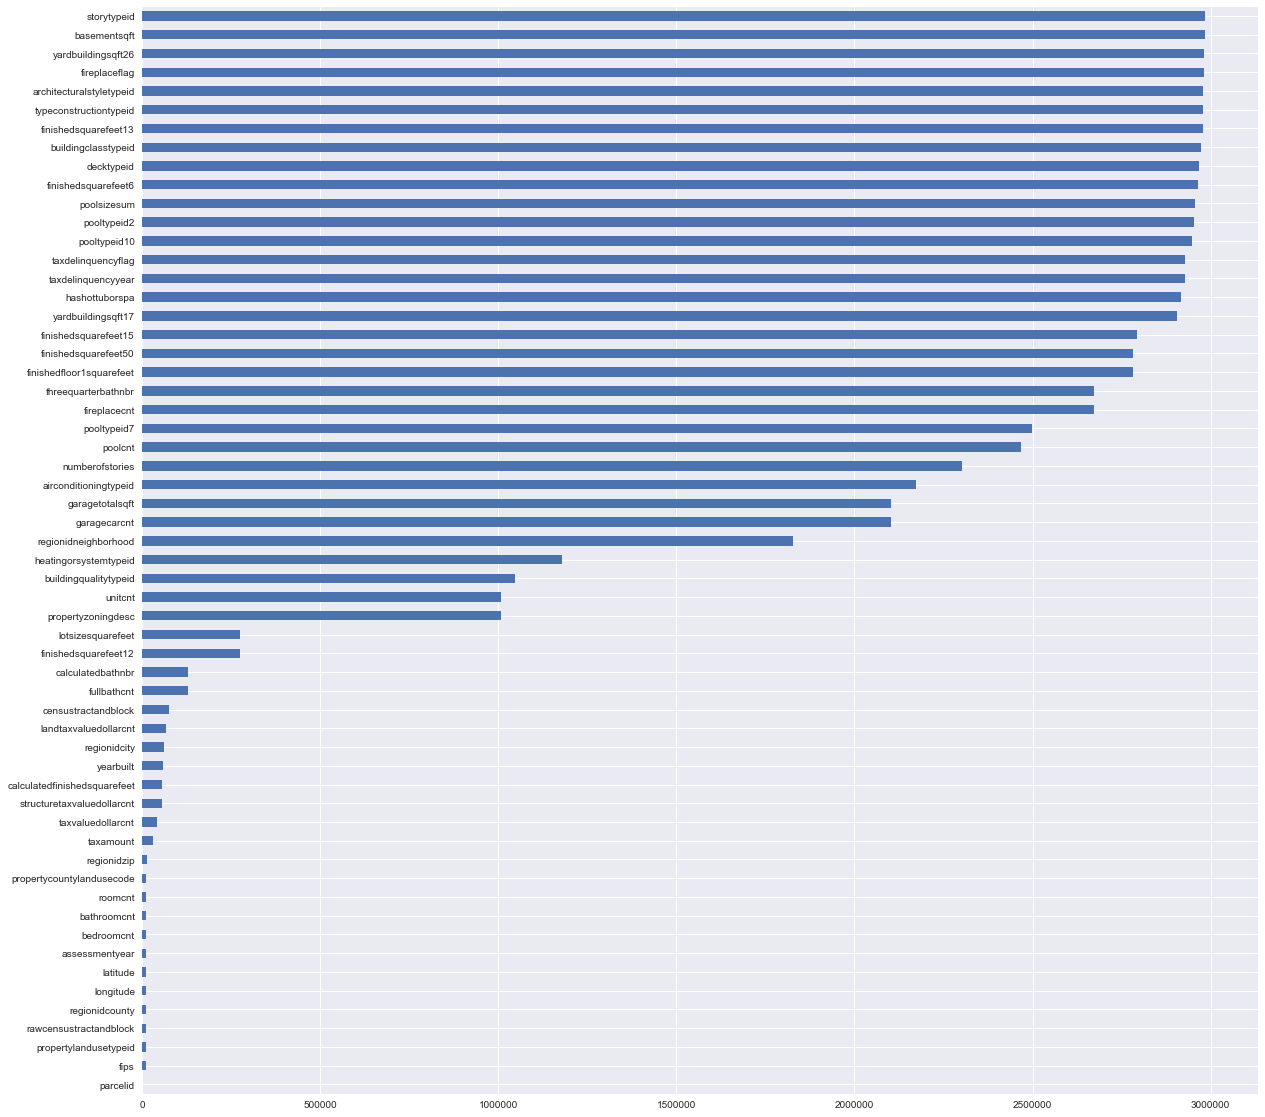

In [10]:
plt.figure(figsize=(20,20))
missing_df=properties2016.isnull().sum().sort_values(ascending=True)
missing_df.plot(kind='barh')

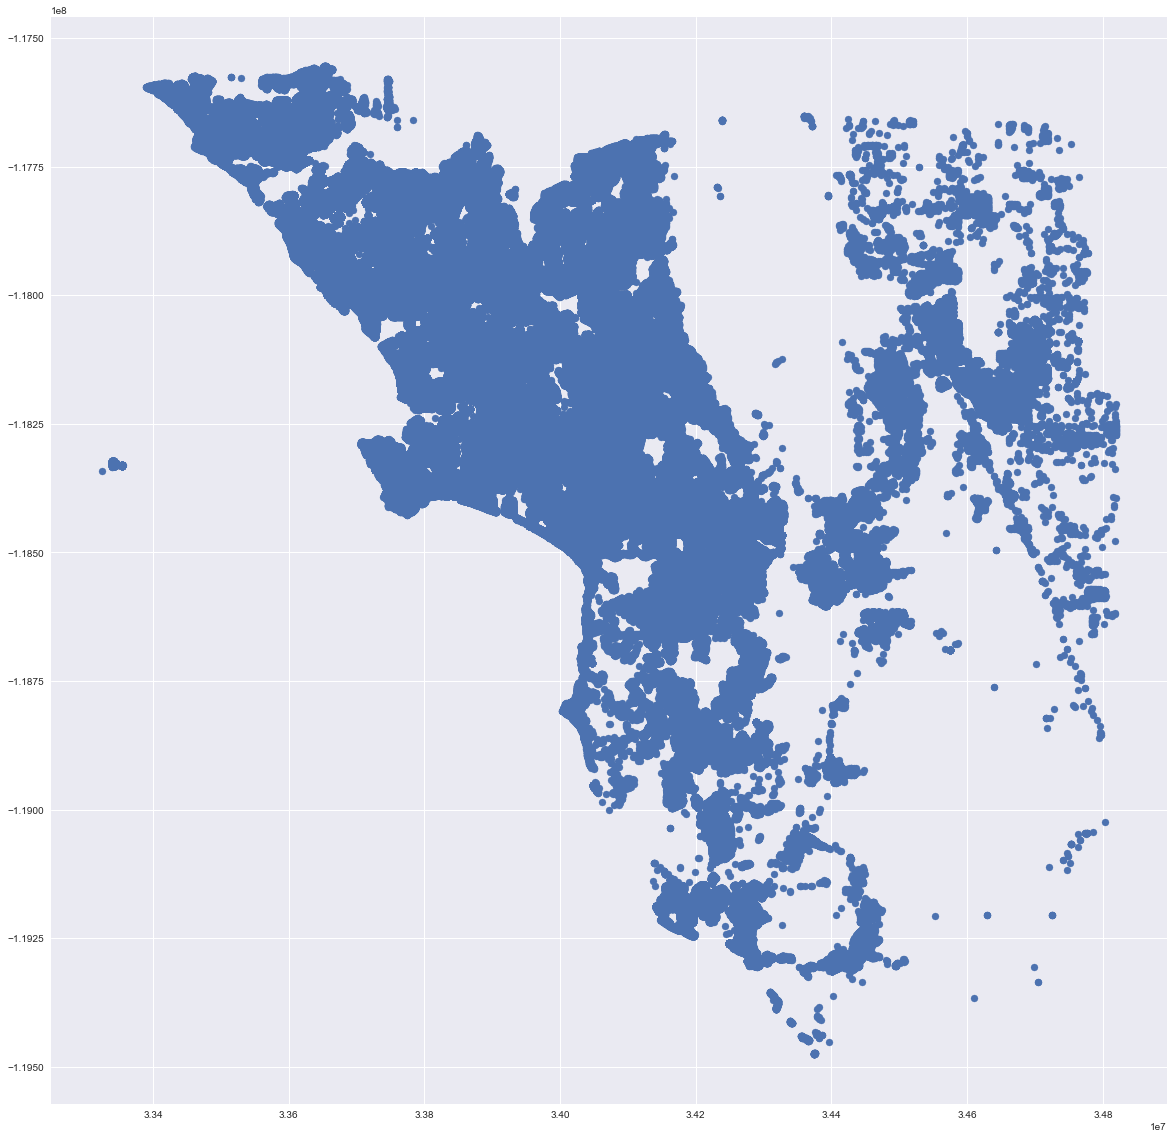

In [11]:
plt.figure(figsize=(20,20))
plt.scatter(x=properties2016.latitude,y=properties2016.longitude)

In [12]:
properties2016.airconditioningtypeid.astype('str')
properties2016.airconditioningtypeid.value_counts().sort_index()

1.0     742364
3.0          7
5.0       8795
9.0         19
11.0      1818
12.0        59
13.0     58457
Name: airconditioningtypeid, dtype: int64

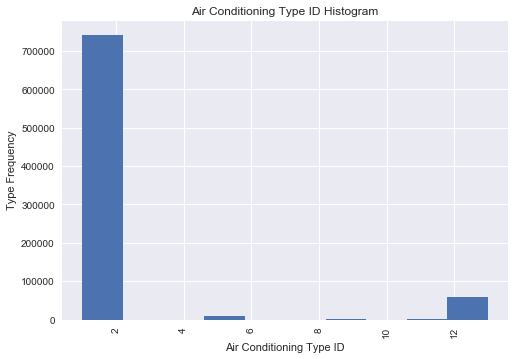

In [13]:
plt.hist(properties2016.airconditioningtypeid.dropna())
plt.xticks(rotation='vertical')
plt.xlabel('Air Conditioning Type ID')
plt.ylabel('Type Frequency')
plt.title('Air Conditioning Type ID Histogram')

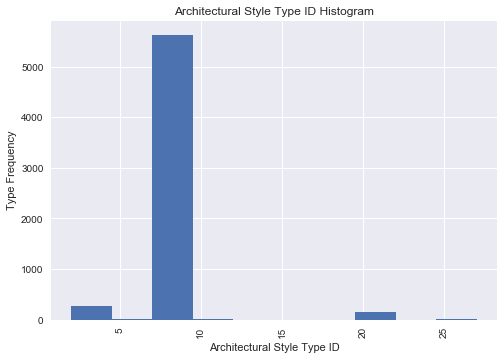

In [14]:
plt.hist(properties2016.architecturalstyletypeid.dropna())
plt.xticks(rotation='vertical')
plt.xlabel('Architectural Style Type ID')
plt.ylabel('Type Frequency')
plt.title('Architectural Style Type ID Histogram')

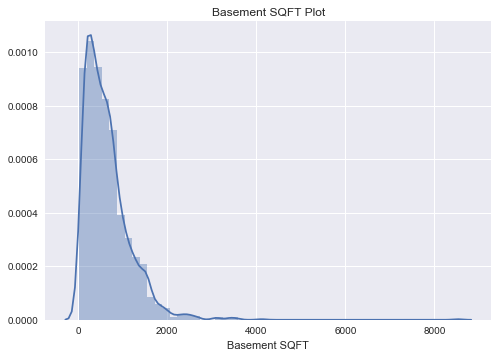

In [15]:
sns.distplot(properties2016.basementsqft.dropna())
plt.xlabel('Basement SQFT')
plt.title('Basement SQFT Plot')

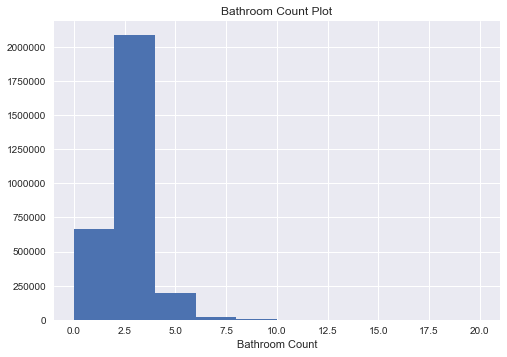

In [16]:
plt.hist(properties2016.bathroomcnt.dropna())
plt.xlabel('Bathroom Count')
plt.title('Bathroom Count Plot')

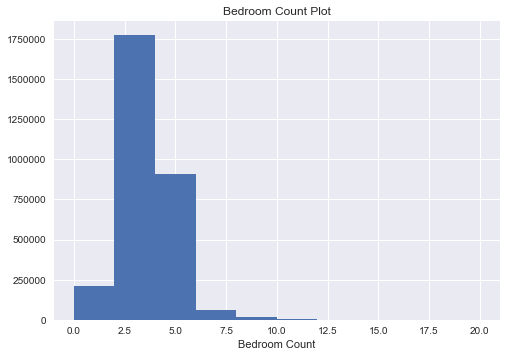

In [17]:
plt.hist(properties2016.bedroomcnt.dropna())
plt.xlabel('Bedroom Count')
plt.title('Bedroom Count Plot')

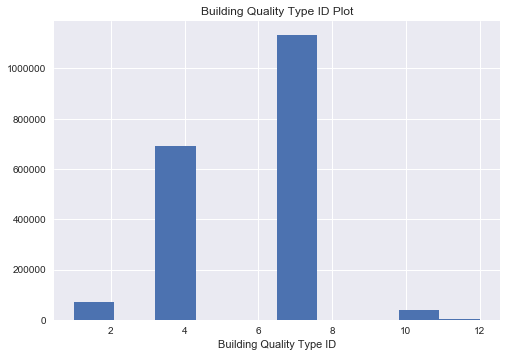

In [18]:
plt.hist(properties2016.buildingqualitytypeid.dropna())
plt.xlabel('Building Quality Type ID')
plt.title('Building Quality Type ID Plot')

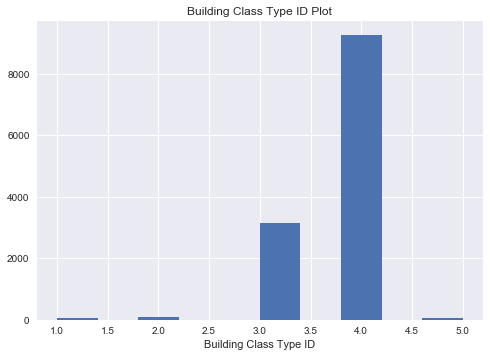

In [19]:
plt.hist(properties2016.buildingclasstypeid.dropna())
plt.xlabel('Building Class Type ID')
plt.title('Building Class Type ID Plot')

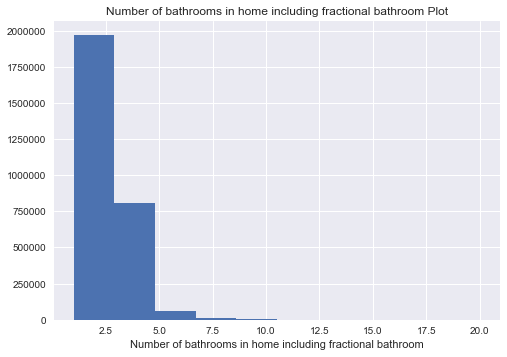

In [20]:
plt.hist(properties2016.calculatedbathnbr.dropna())
plt.xlabel('Number of bathrooms in home including fractional bathroom')
plt.title('Number of bathrooms in home including fractional bathroom Plot')

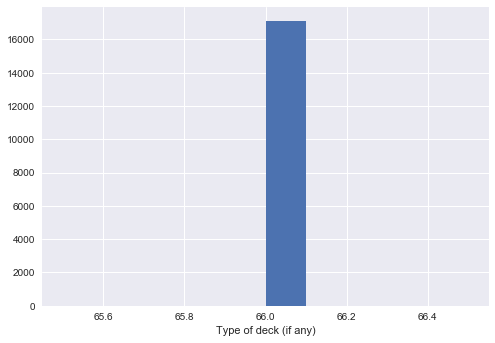

In [21]:
plt.hist(properties2016.decktypeid.dropna())
plt.xlabel('Type of deck (if any)')

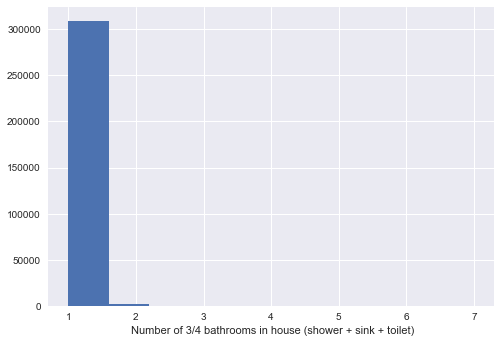

In [22]:
plt.hist(properties2016.threequarterbathnbr.dropna())
plt.xlabel(' Number of 3/4 bathrooms in house (shower + sink + toilet)')

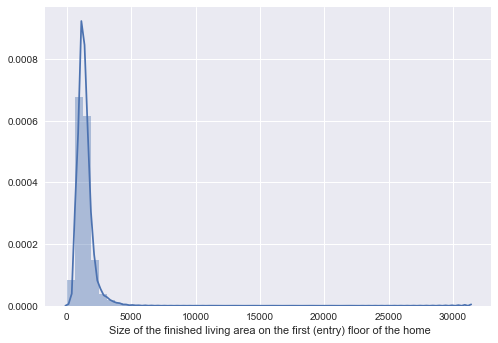

In [23]:
sns.distplot(properties2016.finishedfloor1squarefeet.dropna())
plt.xlabel(' Size of the finished living area on the first (entry) floor of the home')

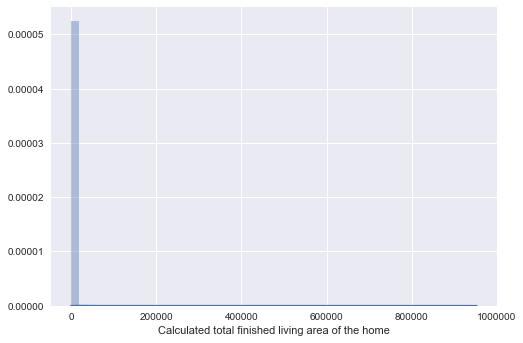

In [24]:
sns.distplot(properties2016.calculatedfinishedsquarefeet.dropna())
plt.xlabel('Calculated total finished living area of the home')

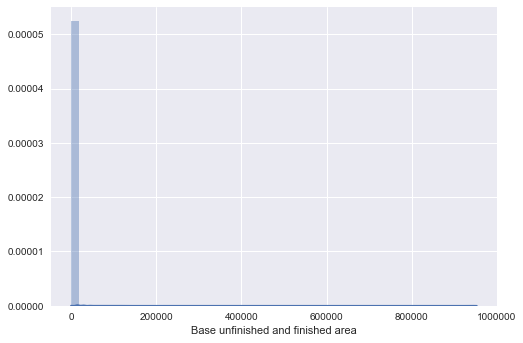

In [25]:
sns.distplot(properties2016.finishedsquarefeet6.dropna())
plt.xlabel('Base unfinished and finished area')

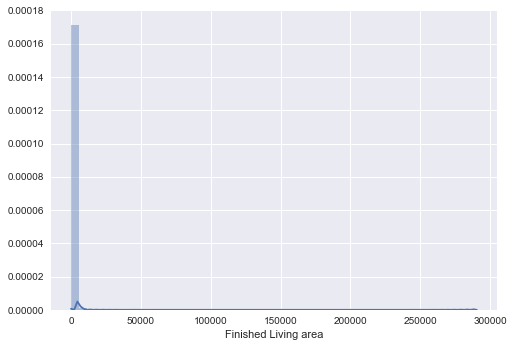

In [26]:
sns.distplot(properties2016.finishedsquarefeet12.dropna())
plt.xlabel('Finished Living area')

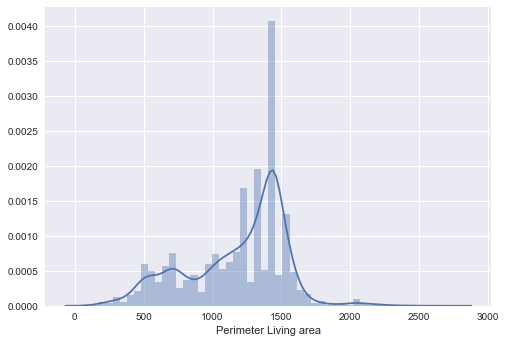

In [27]:
sns.distplot(properties2016.finishedsquarefeet13.dropna())
plt.xlabel('Perimeter Living area')

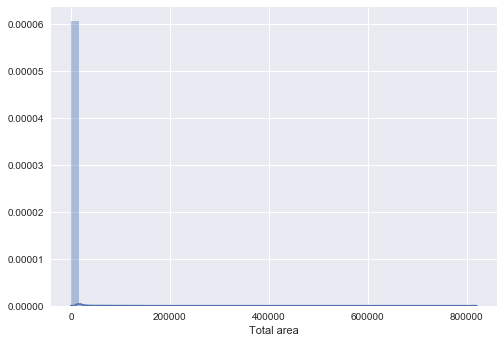

In [28]:
sns.distplot(properties2016.finishedsquarefeet15.dropna())
plt.xlabel('Total area')

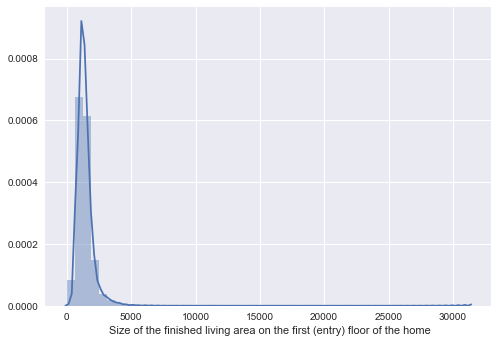

In [29]:
sns.distplot(properties2016.finishedsquarefeet50.dropna())
plt.xlabel(' Size of the finished living area on the first (entry) floor of the home')

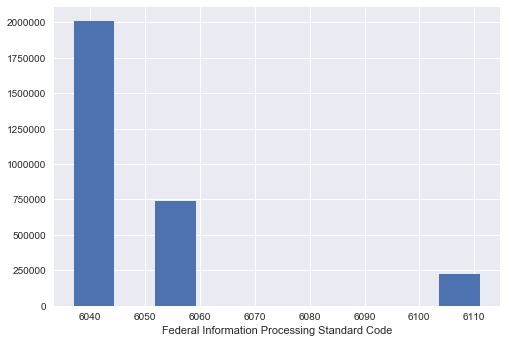

In [30]:
plt.hist(properties2016.fips.dropna())
plt.xlabel('Federal Information Processing Standard Code')

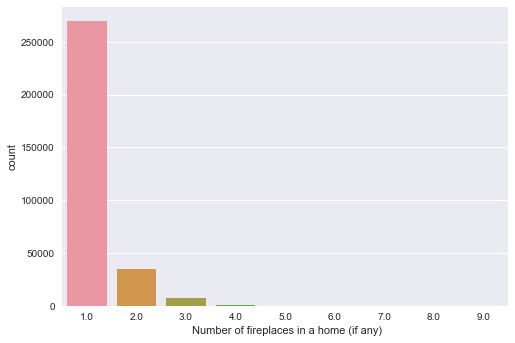

In [31]:
sns.countplot(properties2016.fireplacecnt.dropna())
plt.xlabel(' Number of fireplaces in a home (if any)')

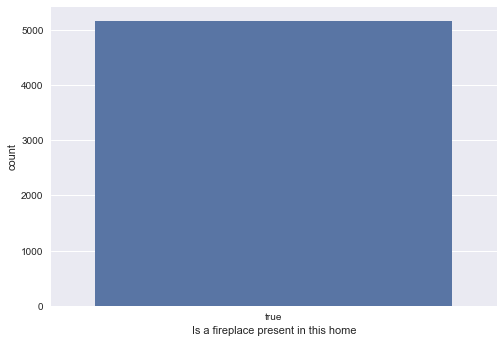

In [32]:
sns.countplot(properties2016.fireplaceflag.dropna())
plt.xlabel('Is a fireplace present in this home')

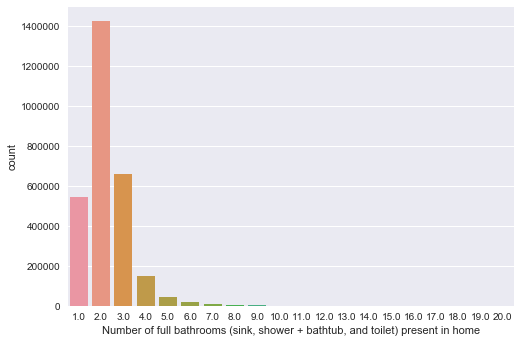

In [33]:
sns.countplot(properties2016.fullbathcnt.dropna())
plt.xlabel('Number of full bathrooms (sink, shower + bathtub, and toilet) present in home')

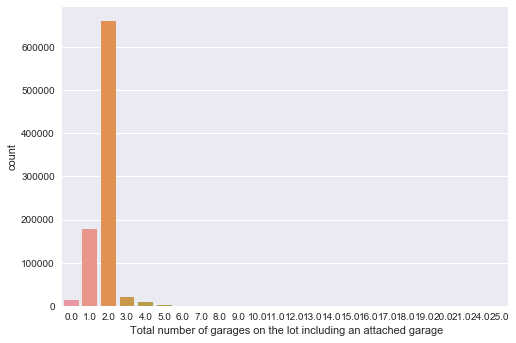

In [34]:
sns.countplot(properties2016.garagecarcnt.dropna())
plt.xlabel(' Total number of garages on the lot including an attached garage')

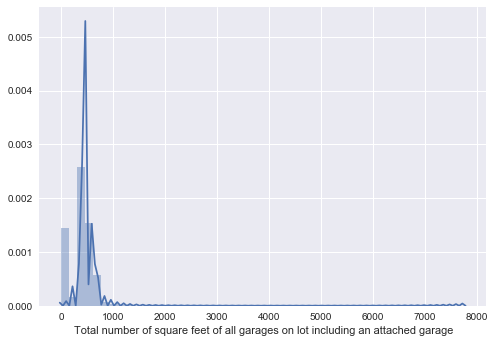

In [35]:
sns.distplot(properties2016.garagetotalsqft.dropna())
plt.xlabel(' Total number of square feet of all garages on lot including an attached garage')

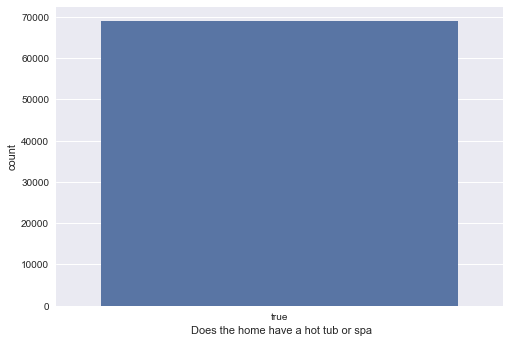

In [36]:
sns.countplot(properties2016.hashottuborspa.dropna())
plt.xlabel(' Does the home have a hot tub or spa')

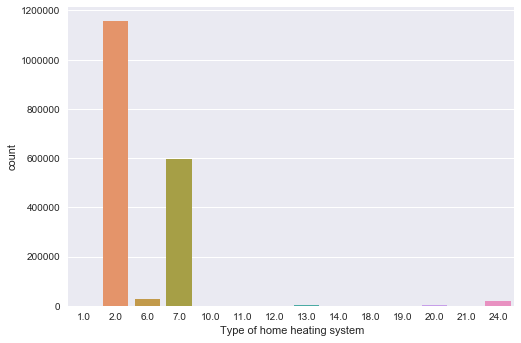

In [37]:
sns.countplot(properties2016.heatingorsystemtypeid.dropna())
plt.xlabel(' Type of home heating system')

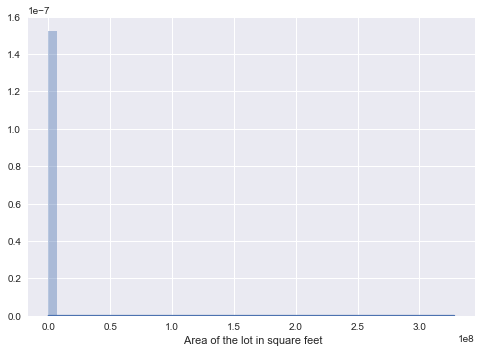

In [38]:
sns.distplot(properties2016.lotsizesquarefeet.dropna())
plt.xlabel(' Area of the lot in square feet')

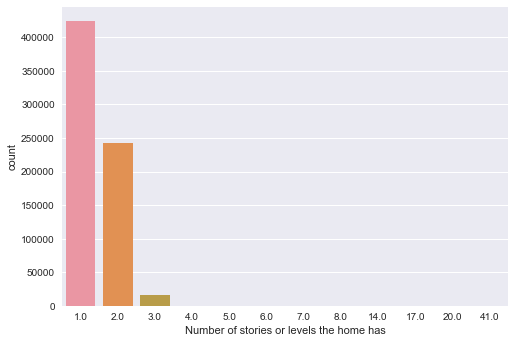

In [39]:
sns.countplot(properties2016.numberofstories.dropna())
plt.xlabel('Number of stories or levels the home has')

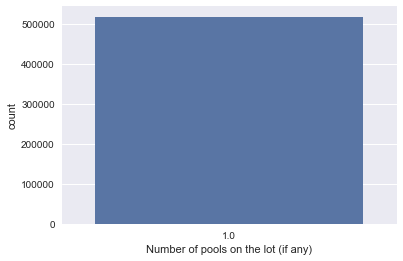

In [167]:
sns.countplot(properties2016.poolcnt.dropna())
plt.xlabel('Number of pools on the lot (if any)')

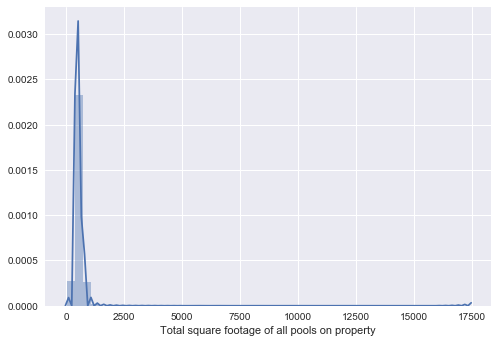

In [40]:
sns.distplot(properties2016.poolsizesum.dropna())
plt.xlabel('Total square footage of all pools on property')

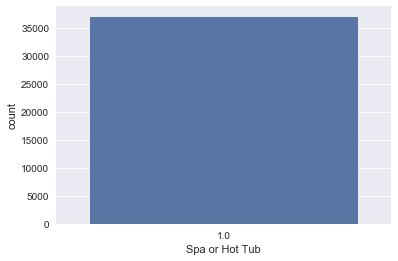

In [170]:
sns.countplot(properties2016.pooltypeid10.dropna())
plt.xlabel('Spa or Hot Tub')

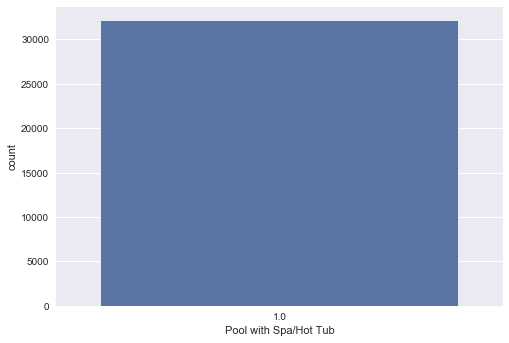

In [41]:
sns.countplot(properties2016.pooltypeid2.dropna())
plt.xlabel('Pool with Spa/Hot Tub')

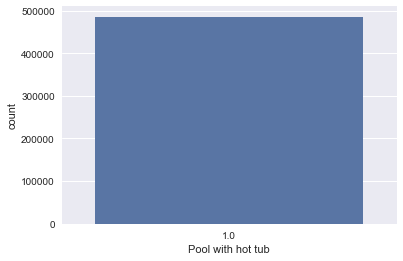

In [172]:
sns.countplot(properties2016.pooltypeid7.dropna())
plt.xlabel('Pool with hot tub')

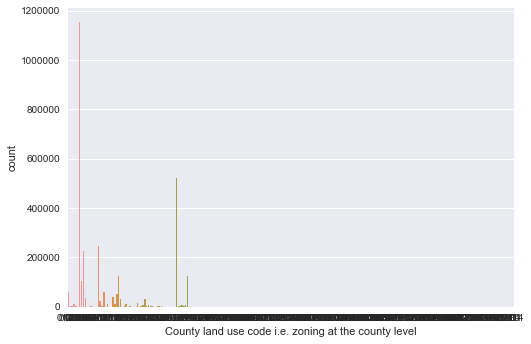

In [42]:
sns.countplot(properties2016.propertycountylandusecode.dropna())
plt.xlabel('County land use code i.e. zoning at the county level')

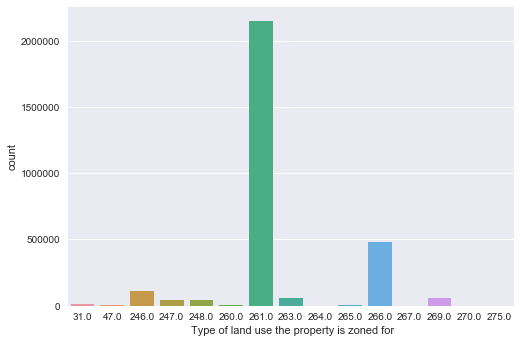

In [43]:
sns.countplot(properties2016.propertylandusetypeid.dropna())
plt.xlabel(' Type of land use the property is zoned for')

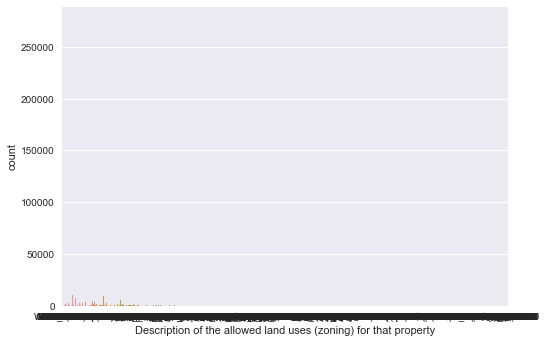

In [44]:
sns.countplot(properties2016.propertyzoningdesc.dropna())
plt.xlabel('Description of the allowed land uses (zoning) for that property')

In [45]:
properties2016.rawcensustractandblock.dropna().head()
#plt.xlabel(' Census tract and block ID combined - also contains blockgroup assignment by extension')

0    6.037800e+07
1    6.037800e+07
2    6.037703e+07
3    6.037141e+07
4    6.037123e+07
Name: rawcensustractandblock, dtype: float64

In [48]:
properties2016.censustractandblock.dropna().head()
#plt.xlabel(' Census tract and block ID combined - also contains blockgroup assignment by extension')

295    6.111001e+13
296    6.111001e+13
297    6.111001e+13
298    6.111001e+13
299    6.111001e+13
Name: censustractandblock, dtype: float64

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

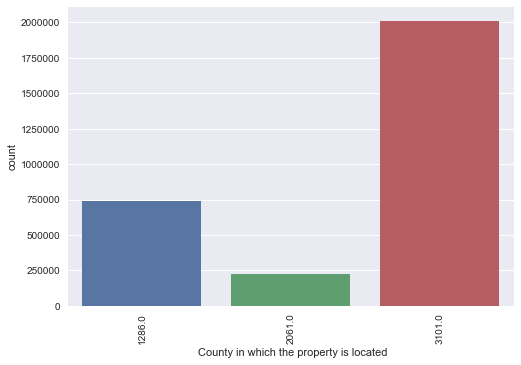

In [52]:
sns.countplot(properties2016.regionidcounty.dropna())
plt.xlabel(' County in which the property is located')
plt.xticks(rotation='vertical')

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

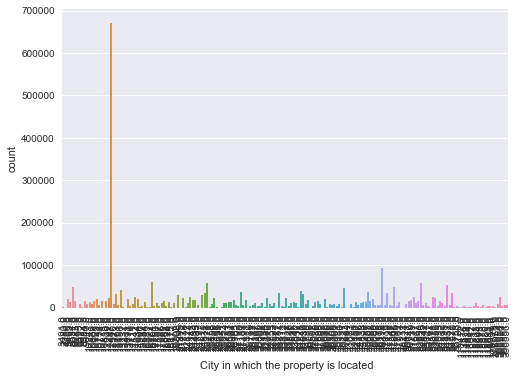

In [53]:
sns.countplot(properties2016.regionidcity.dropna())
plt.xlabel(' City in which the property is located')
plt.xticks(rotation='vertical')

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

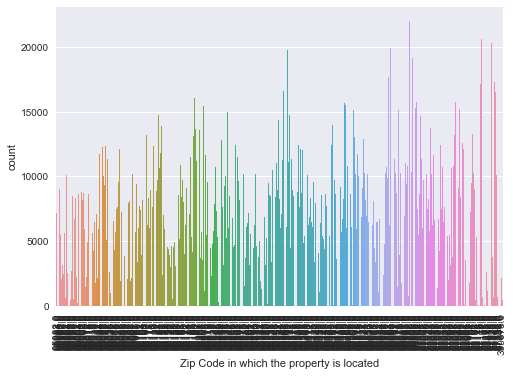

In [56]:
sns.countplot(properties2016.regionidzip.dropna())
plt.xlabel('Zip Code in which the property is located')
plt.xticks(rotation='vertical')

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

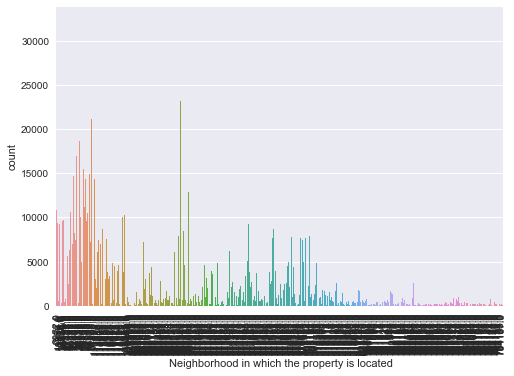

In [58]:
sns.countplot(properties2016.regionidneighborhood.dropna())
plt.xlabel(' Neighborhood in which the property is located')
plt.xticks(rotation='vertical')

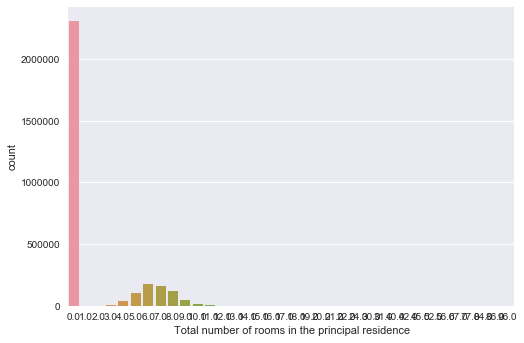

In [59]:
sns.countplot(properties2016.roomcnt.dropna())
plt.xlabel(' Total number of rooms in the principal residence')

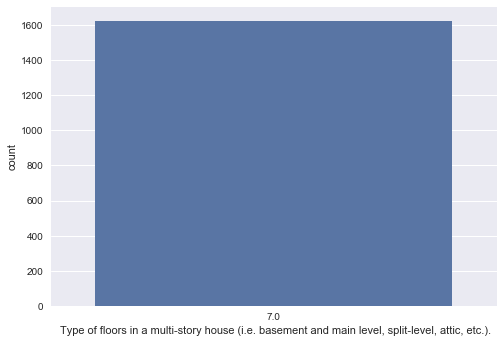

In [60]:
sns.countplot(properties2016.storytypeid.dropna())
plt.xlabel(' Type of floors in a multi-story house (i.e. basement and main level, split-level, attic, etc.).')

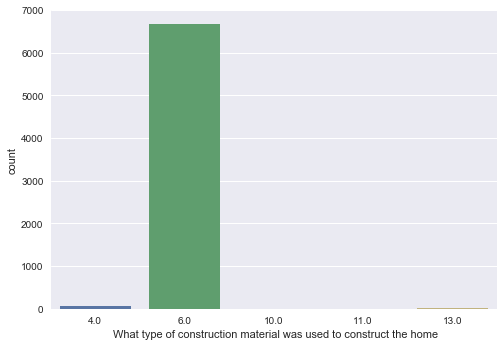

In [61]:
sns.countplot(properties2016.typeconstructiontypeid.dropna())
plt.xlabel(' What type of construction material was used to construct the home')

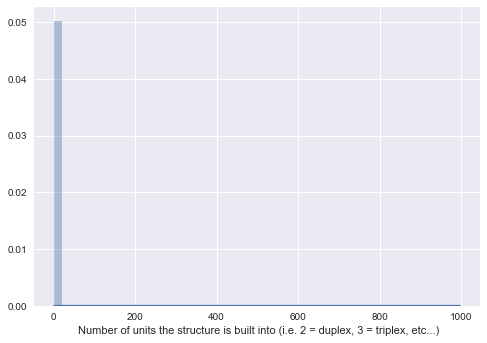

In [63]:
sns.distplot(properties2016.unitcnt.dropna())
plt.xlabel(' Number of units the structure is built into (i.e. 2 = duplex, 3 = triplex, etc...)')

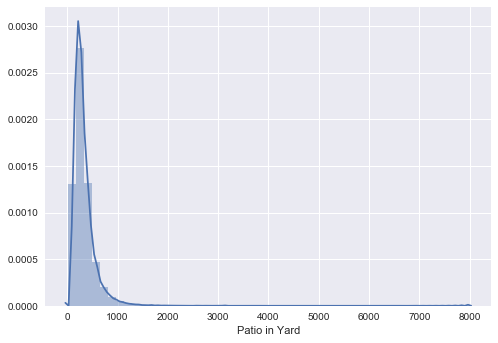

In [64]:
sns.distplot(properties2016.yardbuildingsqft17.dropna())
plt.xlabel('Patio in Yard')

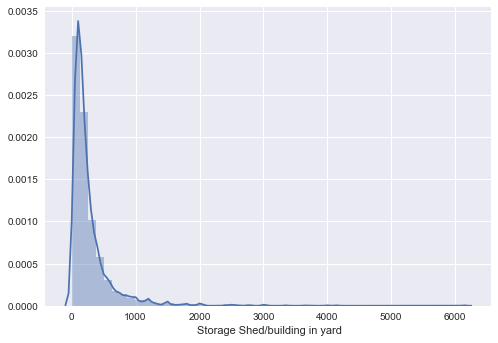

In [65]:
sns.distplot(properties2016.yardbuildingsqft26.dropna())
plt.xlabel(' Storage Shed/building in yard')

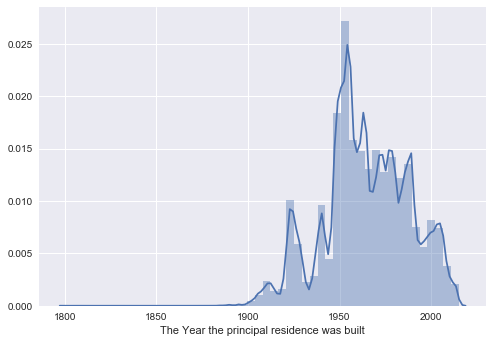

In [66]:
sns.distplot(properties2016.yearbuilt.dropna())
plt.xlabel(' The Year the principal residence was built ')

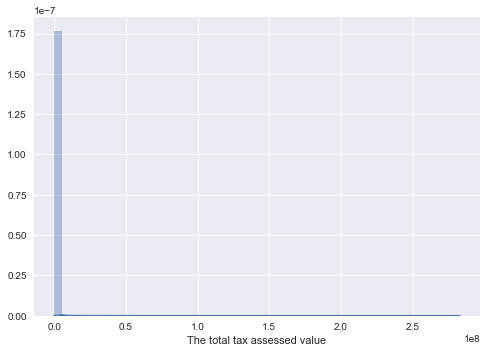

In [68]:
sns.distplot(properties2016.taxvaluedollarcnt.dropna())
plt.xlabel('The total tax assessed value')

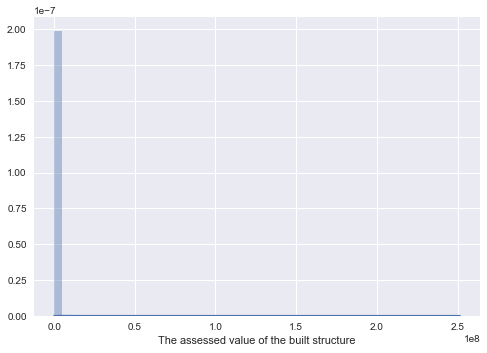

In [69]:
sns.distplot(properties2016.structuretaxvaluedollarcnt.dropna())
plt.xlabel('The assessed value of the built structure')

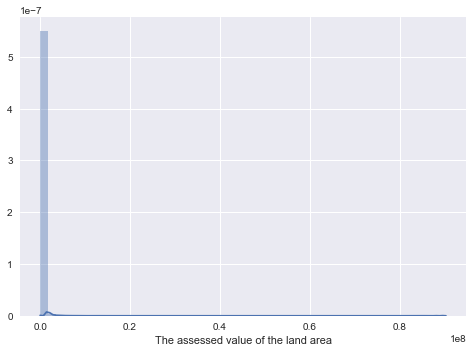

In [71]:
sns.distplot(properties2016.landtaxvaluedollarcnt.dropna())
plt.xlabel('The assessed value of the land area')

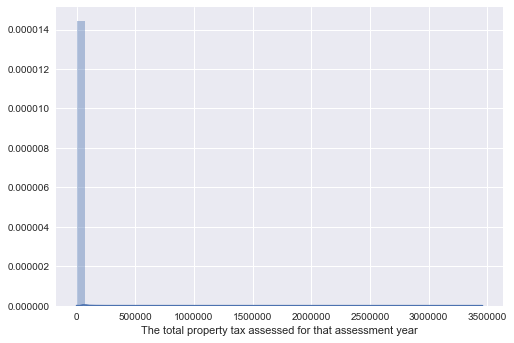

In [72]:
sns.distplot(properties2016.taxamount.dropna())
plt.xlabel('The total property tax assessed for that assessment year')

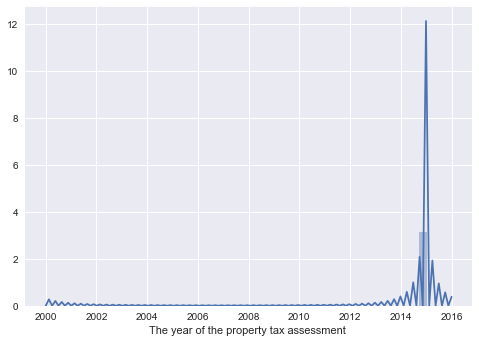

In [73]:
sns.distplot(properties2016.assessmentyear.dropna())
plt.xlabel('The year of the property tax assessment ')

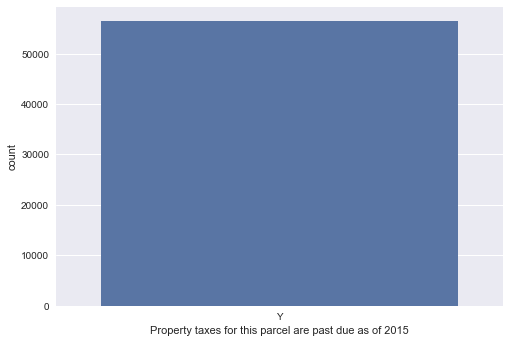

In [75]:
sns.countplot(properties2016.taxdelinquencyflag.dropna())
plt.xlabel('Property taxes for this parcel are past due as of 2015')

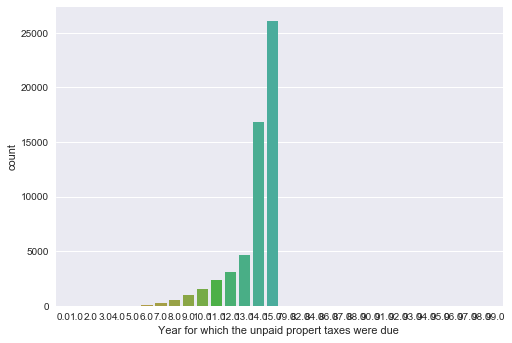

In [76]:
sns.countplot(properties2016.taxdelinquencyyear.dropna())
plt.xlabel('Year for which the unpaid propert taxes were due ')